In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

# Caso servicio en DC

In [ ]:
#row = vec.iloc[0]
#delay_dc = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_dc = pd.concat((mean_delay_dc, row))
#mean_delay_dc = mean_delay_dc.groupby(level=0).mean()

In [2]:
# Cargamos los datos
targetDcDelay = pd.read_csv("targetDcDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetDcDelay[(targetDcDelay.name == 'roundTripTime:vector') & (targetDcDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersDcDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersDcDelay

,avg,stddev,min,max
0,385.109095,730.919460,184.036432,6238.593540
1,350.817513,468.616377,184.036122,3189.852734
2,283.475110,318.163652,184.035710,2189.176156
3,356.223036,464.827661,184.036060,2500.721868
4,328.087525,413.781069,184.036325,2200.454153
5,559.035882,1860.778241,184.036028,19232.450583
6,420.686538,872.938344,184.037636,8853.744297
7,474.036871,735.021561,184.036467,4192.906683
8,394.559639,631.426435,184.036800,4184.422363
9,440.565448,618.961048,184.035783,4194.341727


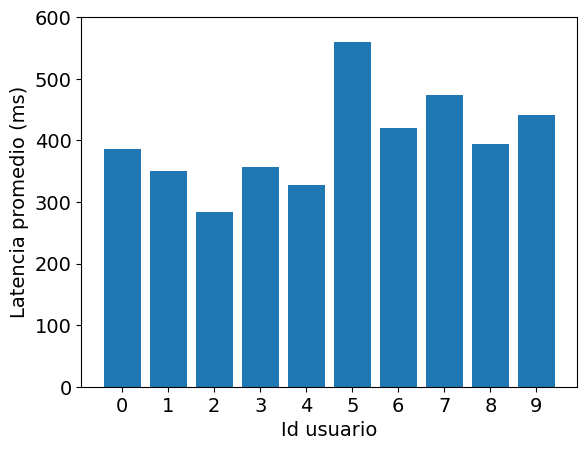

In [3]:
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_xticks(range(0,10))
ax.set_ylim([0,600])
fig = plt.gcf()
fig.savefig("mediumDelaysDc.pdf")
#plt.show()

# Caso servicio en Fog

In [3]:
# Cargamos los datos
targetFogDelay = pd.read_csv("targetFogDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetFogDelay[(targetFogDelay.name == 'roundTripTime:vector') & (targetFogDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersFogDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersFogDelay

,avg,stddev,min,max
0,80.985494,129.081005,64.034901,1064.037447
1,106.409092,201.438387,64.034889,1064.037299
2,123.360211,269.725661,64.034891,2064.037324
3,89.472763,157.406269,64.034949,1064.037023
4,104.735499,226.375421,64.034883,1864.720384
5,90.174917,161.958343,64.034914,1148.388894
6,89.464979,157.407404,64.035026,1064.036018
7,72.517552,91.665985,64.034954,1064.036472
8,80.990107,129.080427,64.035051,1064.037882
9,80.995909,129.079598,64.034892,1064.036586


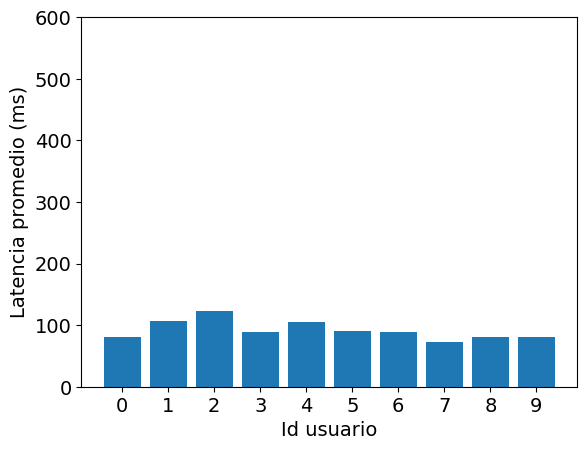

In [5]:
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersFogDelay.index, usersFogDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_xticks(range(0,10))
ax.set_ylim([0,600])
fig = plt.gcf()
fig.savefig("mediumDelaysFog.pdf")

# Comparativa Dc vs Fog

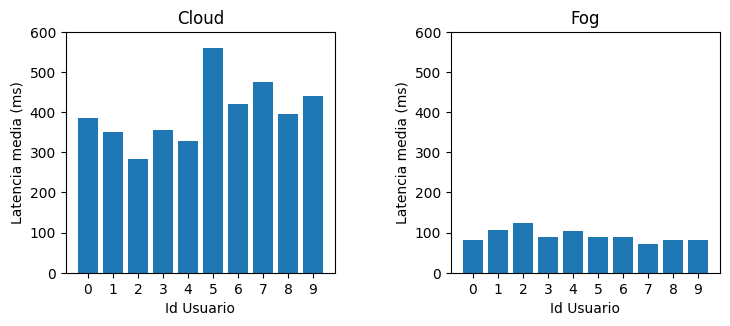

In [32]:
fig, (ax) = plt.subplots(1, 2, figsize=(4,3))
#fig.suptitle('Latencia servicio-cliente por usuario')

fig.tight_layout()
fig.set_size_inches(8, 3)
#plt.ylabel("Latencia promedio (ms)")
#plt.xlabel("Id usuario")
ax[0].set_title("Cloud")
ax[1].set_title("Fog")

ax[0].bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax[1].bar(usersFogDelay.index, usersFogDelay.avg)

for x in ax:
    x.set_ylim(0,600)
    x.set_xticks(range(0,10))
    x.set(xlabel='Id Usuario', ylabel='Latencia media (ms)')

#fig.savefig("mediumDelays.pdf", bbox_inches='tight')

# Estadísticas comparativas

In [4]:
usersDcDelay.describe()

,avg,stddev,min,max
count,10.000000,10.000000,10.000000,10.000000
mean,399.259666,711.543385,184.036336,5697.666410
std,79.006334,437.924163,0.000563,5178.026095
min,283.475110,318.163652,184.035710,2189.176156
25%,352.168894,465.774840,184.036036,2673.004585
50%,389.834367,625.193741,184.036224,4188.664523
75%,435.595720,733.996035,184.036458,5727.530587
max,559.035882,1860.778241,184.037636,19232.450583


In [5]:
usersFogDelay.describe()

,avg,stddev,min,max
count,10.000000,10.000000,10.000000,10.000000
mean,91.910652,165.321850,64.034935,1252.540533
std,15.320774,53.160379,0.000060,379.015384
min,72.517552,91.665985,64.034883,1064.036018
25%,80.991558,129.080572,64.034891,1064.036695
50%,89.468871,157.406836,64.034907,1064.037373
75%,101.095353,191.568376,64.034953,1127.301141
max,123.360211,269.725661,64.035051,2064.037324
